In [6]:
# machine learning classification

from sklearn.svm import SVC

from sklearn.metrics import scorer

from sklearn.metrics import accuracy_score

# For data manipulation

import pandas as pd

import numpy as np

# To plot

import matplotlib.pyplot as plt

import seaborn

# To fetch data

from pandas_datareader import data as pdr

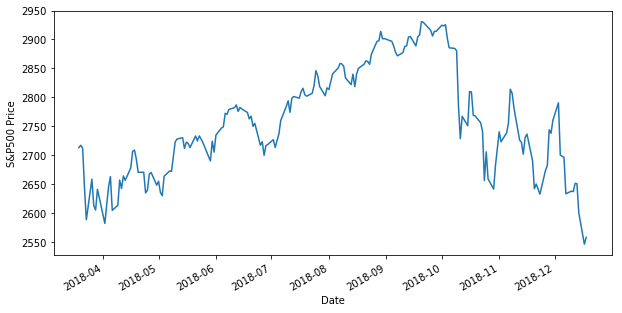

In [19]:
Df = pdr.get_data_yahoo('^GSPC', start="2018-03-18", end="2018-12-18")        

Df= Df.dropna()

Df.Close.plot(figsize=(10,5))

plt.ylabel("S&P500 Price")

plt.show()

In [20]:
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)


In [21]:
y

array([ 1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1,  1, -1])

In [22]:
Df['Open-Close'] = Df.Open - Df.Close

Df['High-Low'] = Df.High - Df.Low

X=Df[['Open-Close','High-Low']]

In [23]:
X.head()

,Open-Close,High-Low
Date,,
2018-03-19,28.459961,46.789795
2018-03-20,-1.889893,14.169922
2018-03-21,3.060059,29.349854
2018-03-22,47.670166,54.089844
2018-03-23,58.449951,71.780029


In [24]:
split_percentage = 0.8

split = int(split_percentage*len(Df))

In [25]:
# Train data set

X_train = X[:split]

y_train = y[:split]

In [26]:
# Test data set

X_test = X[split:]

y_test = y[split:]

In [27]:
cls = SVC().fit(X_train, y_train)

In [28]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))

accuracy_test = accuracy_score(y_test, cls.predict(X_test))

In [29]:
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))

print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 95.39%
Test Accuracy: 48.72%


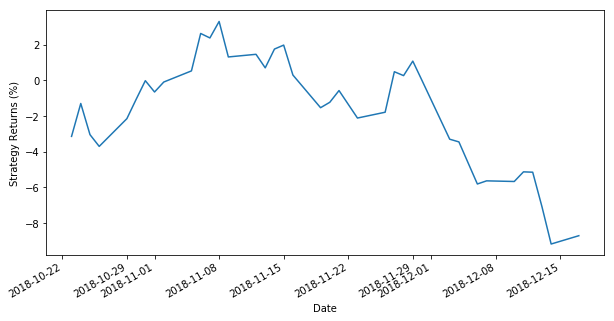

In [30]:
Df['Predicted_Signal'] = cls.predict(X)
# Calculate log returns

Df['Return'] = np.log(Df.Close.shift(-1) / Df.Close)*100

Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

Df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))

plt.ylabel("Strategy Returns (%)")

plt.show()

In [48]:
from sklearn.externals import joblib
joblib.dump(cls, 'model.pkl')

['model.pkl']